# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:https://www.kaggle.com/datasets/neurocipher/heartdisease

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [38]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
heart_data = pd.read_csv(r"C:\Users\lred1\Desktop\Launchcode\SQL\Checkpoint 2 EDA\Heart_Disease_Prediction.csv")
# Did creating the dataframe work?
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
# show the first 4 rows
heart_data.head(4)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence


In [20]:
# check how many rows and columns are present
heart_data.shape

(270, 14)

In [21]:
# get a look at null counts
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [22]:
# what unique heart diseases are present?
heart_data['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [23]:
# what genders are represented?
heart_data['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

In [24]:
# peek at the gene count stats
heart_data['Age'].describe()

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

In [25]:
# how many zero values are present in Gene Counts
(heart_data['Age'] == 0).value_counts()


Age
False    270
Name: count, dtype: int64

In [ ]:
Visualize
Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

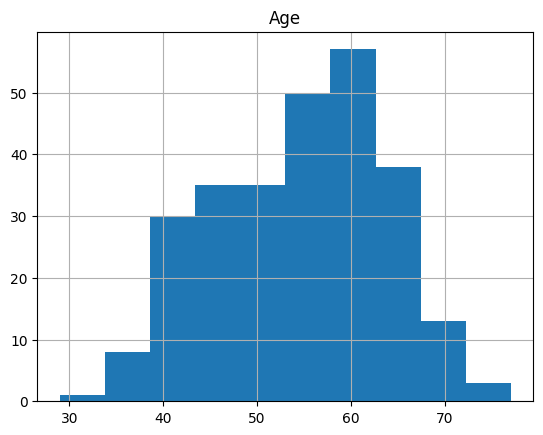

In [26]:
heart_data.hist('Age')
plt.show()

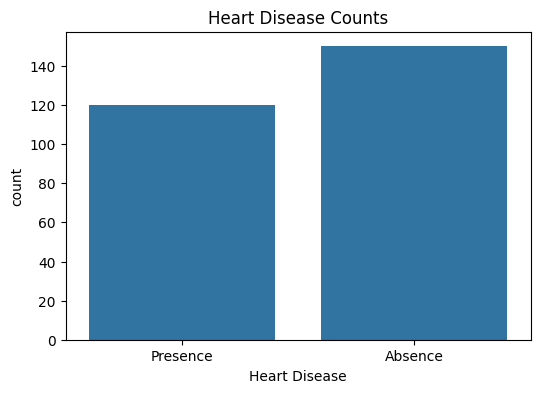

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Heart Disease', data=heart_data)
plt.title("Heart Disease Counts")
plt.show()


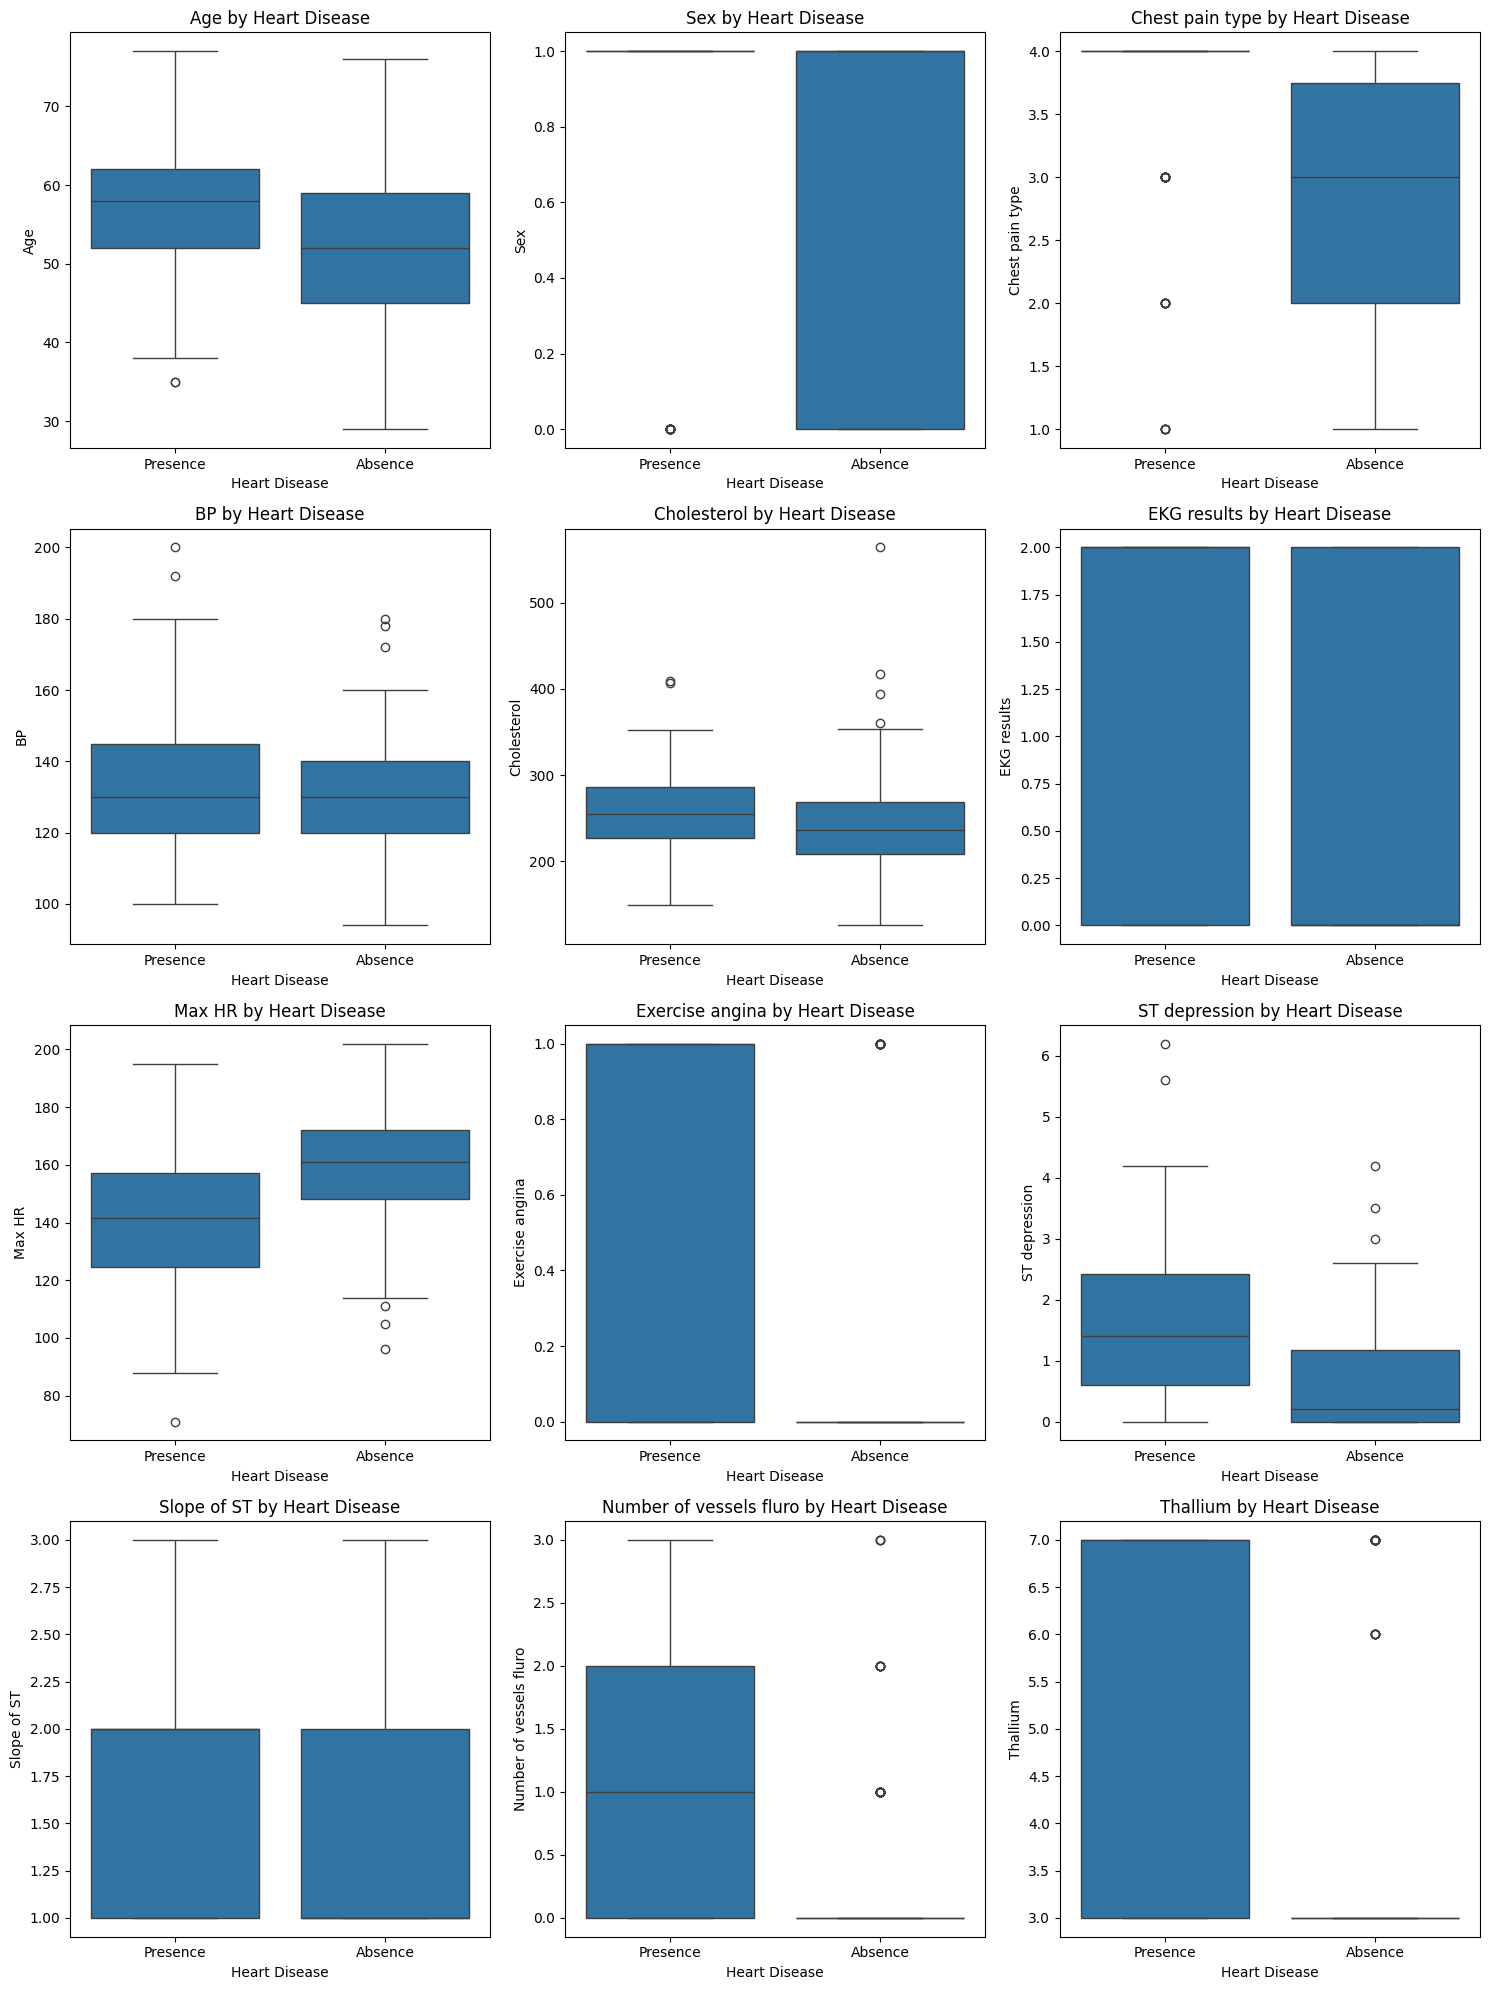

In [45]:
# Boxplots by Heart Disease
numeric_cols = heart_data.select_dtypes(include='number').columns.drop('FBS over 120')

cols = 3
rows = math.ceil(len(numeric_cols) / cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x='Heart Disease', y=col, data=heart_data)
    plt.title(f'{col} by Heart Disease')

plt.tight_layout()
plt.show()

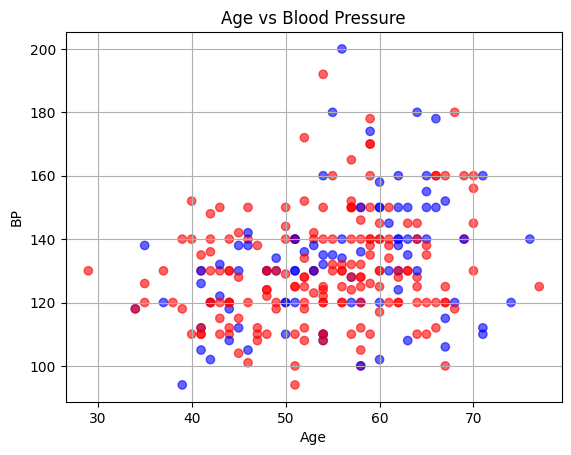

<Figure size 1200x600 with 0 Axes>

In [15]:
# SHow the distribution of Age counts by BP
colors = heart_data['Sex'].map({0: 'blue', 1: 'red'})  # assuming 0=Female, 1=Male
plt.scatter(heart_data['Age'], heart_data['BP'], alpha=0.6, c=colors)
plt.title('Age vs Blood Pressure')
plt.xlabel('Age')
plt.ylabel('BP')
plt.grid(True)
plt.figure(figsize=(12,6))
plt.show()



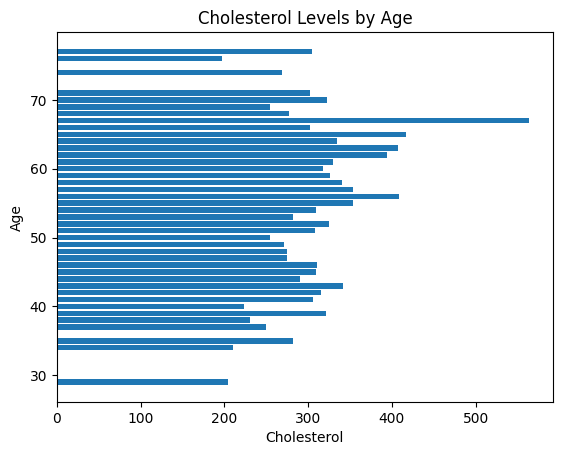

In [16]:
plt.barh(heart_data["Age"], heart_data["Cholesterol"], align='center')
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.title("Cholesterol Levels by Age")
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
   Answer: Older patients generally have a higher chance of heart disease, but there are younger patients affected too.
           Maximum heart rate tends to be lower in patients with heart disease, which aligns with clinical expectations.
           Certain chest pain types and number of vessels fluro show a strong association with heart disease presence.
2. Do you have any concerns about your dataset?
   Answer:Some columns like Chest pain type, EKG results, Slope of ST, Thallium are numeric codes. These may need proper mapping or encoding before              modeling.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
   Answer:Map numeric codes to meaningful labels.